In [143]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import IFrame
from IPython.display import Image

In [144]:
data = pd.read_csv("phishing.csv", sep=";",header = 0, index_col = None,)

In [145]:
#del data['URL_of_Anchor']
data.describe()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
colnames = data.columns.get_values()
data_array = data.values
colnames

array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

In [147]:
samples = data_array[:,:-1]
labels = data_array[:, -1]

# Separate the training and testing data
train_inputs = samples[:7000]
train_outputs = labels[:7000]
test_inputs = samples[7000:]
test_outputs = labels[7000:]

In [152]:
treemodel = tree.DecisionTreeClassifier(max_depth=3)
treemodel.fit(train_inputs, train_outputs)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

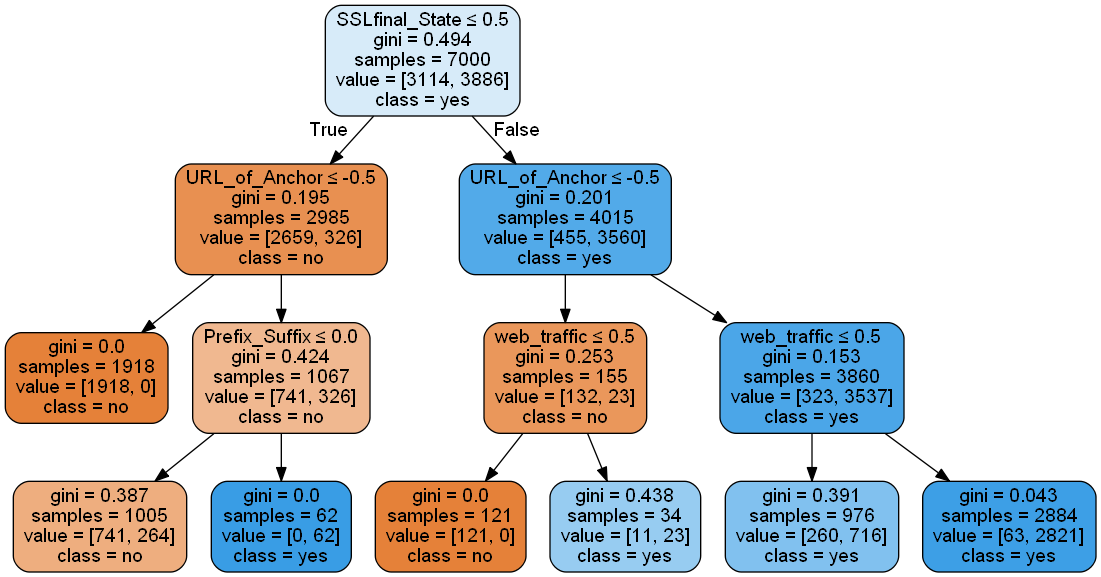

In [153]:
dot_data = StringIO()
export_graphviz(treemodel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['no','yes'],feature_names=colnames[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h3>How to read decision tree</h3>

First check if website is using trustworthy HTTPS certificate. It is very likely a legitimate website if this is the case. If certification is okay, but anchor tags have different domain names and/or don't lead to any webpage you should check domain for prefixes and suffixes. If domain contains them, it is very likely a phishing attempt. Otherwise it most probably is fine.

If website doesn't use trustworthy HTTPS certificates, it is most likely a phishing site. Only sites that passes both the anchor tags test and have a lot of web traffic are safe. If site fails both anchor tag test and doesn't have a lot of traffic, it is most likely a phishing attempt.


In [154]:
#graph.write_pdf("tree.pdf")
#graph.write_png("tree.png")

In [155]:
testing = treemodel.predict(test_inputs)
print(accuracy_score(test_outputs, testing))

0.906288532675709


In [156]:
# predict

# output confusion matrix
cm = confusion_matrix(test_outputs, testing)
print("Confusion matrix:\n",cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("Accuracy calculated from the training set = %.3f" % (accuracy))

print(classification_report(test_outputs, testing, target_names=['no', 'yes']))

Confusion matrix:
 [[1575  209]
 [ 171 2100]]
Accuracy calculated from the training set = 0.906
              precision    recall  f1-score   support

          no       0.90      0.88      0.89      1784
         yes       0.91      0.92      0.92      2271

   micro avg       0.91      0.91      0.91      4055
   macro avg       0.91      0.90      0.90      4055
weighted avg       0.91      0.91      0.91      4055

